# Proyecto Final: Modelo para el resfriado común en una casa

Para poder hacer la simulación es necesario crear un código que nos genere primero la matriz de transiciones posibles $P_{(i,r)(k,l)}$.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from math import*

In [2]:
#Cantidad de individuos en la familia y parámetro R0
N=5
R0=0.154

In [3]:
#Generamos la matriz de las posibles transiciones
Transiciones=np.zeros((N+1, N+1, N+1, N+1))

In [45]:
#Añadiremos las posibles transiciones

#Primera posible transición: infectados
for i in range(1,N):
    for j in range(N-i):
        Transiciones[i,j,i+1,j]=(R0*(N-i-j))/(R0*(N-i-j)+1)
        
#Segunda posible transición: recuperados
for i in range(1,N+1):
    for j in range(N-i+1):
        Transiciones[i,j,i-1,j+1]=1/(R0*(N-i-j)+1)
        
#Tercer posible transición: estados absorbentes
for j in range(N+1):
        Transiciones[0,j,0,j]=1

Una vez generada la matriz de transiciones posibles, haremos una nueva matriz que sea la distribución de probabilidad en los estados $q_{i,r}(n)$.

In [74]:
#Matriz de distribución de probabilidad en los estados
Q=np.zeros((N+1,N+1))
Q[1,0]=1    #Comenzamos con el estado (1,0)=1

Ahora buscaremos encontrar el tamaño final de la epidemia. Para ello haremos una función que luego iteraremos varias veces con el fin de analizar varios eventos. 

In [75]:
for a in range(10): #Haremos el mismo proceso varias veces simulando varios eventos consecutivos
    Qev=np.zeros((N+1,N+1))
    for i in range(N+1):
        for j in range(N+1):
            for k in range(N+1):
                for l in range(N+1):
                    Qev[i,j]=Qev[i,j]+Transiciones[k,l,i,j]*Q[k,l]
    Q=Qev

El código de arriba nos ayudará a realizar la suma sobre todos los posibles estados $(k,l)$, como planteamos en la parte escrita. Además, esta función nos da el resultado de $n$ eventos suficientes para que termine la pandemia, por lo tanto si imprimimos la matriz final deberíamos ver que los estados de la forma
$$(i,r)=0 \hspace{5mm} i\neq 0, \forall r $$

In [76]:
Q

array([[0.        , 0.61881188, 0.1783383 , 0.1019866 , 0.06631664,
        0.03454659],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ]])

Notamos que efectivamente sí se obtiene una matriz que tiene este comportamiento. Si graficamos los datos, estos se verán como a continuación:

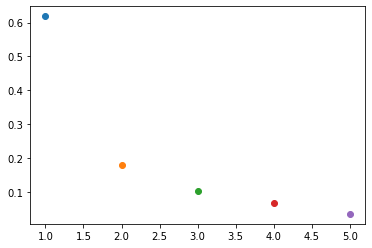

In [77]:
#Ahora graficaremos los datos resultantes
for i in range(1,N+1):
    plt.scatter(i,Q[0,i])

Notamos que los resultados obtenidos sí son probabilidades y hacen sentido. Ahora compararemos con los datos existentes.